In [1]:
import os 
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

In [101]:
%config InlineBackend.figure_format = 'retina'

In [3]:
os.chdir("/Volumes/shared/Molekylär Neurobiologi/Castelo-Branco/Mukund/CZI_ADULT/CZI_ATAC")

In [10]:
results_file = "data/epi/peak_count_AGG_ATAC_results.h5ad"

In [11]:
DATA_PATH = "../../../NGSDATA/scATAC_human_adult_CZI_1/Processed_data/AGG_ATAC_210218/outs/"
PEAK_PATH = DATA_PATH + "peaks.bed"
FRAG_PATH = DATA_PATH + "fragments.tsv.gz"
CSV_PATH = DATA_PATH + "singlecell_EPI.csv"

In [9]:
annot = epi.ct.load_features(PEAK_PATH)

In [12]:
counts = epi.ct.bld_mtx_fly(tsv_file = FRAG_PATH,
                            csv_file = CSV_PATH,
                           annotation = annot,
                           save = "data/epi/peak_count_matrix.h5ad")

loading barcodes
building count matrix


100%|██████████| 265635/265635 [42:09<00:00, 105.01it/s] 


building AnnData object
filtering barcodes


In [ ]:
#########      BUILD 10kb_bin feature matrix       #########
#########                                          #########

#binned_annot = epi.ct.load_features("bin/10kb_binned_hg38.bed")
#counts_10kb = epi.ct.bld_mtx_fly(tsv_file = FRAG_PATH,
#                            csv_file = CSV_PATH,
#                           annotation = binned_annot,
#                           save = "data/epi/10kb_count_matrix.h5ad")

In [16]:
adata = ad.read("data/epi/peak_count_matrix.h5ad")
adata

AnnData object with n_obs × n_vars = 19062 × 265635

In [20]:
epi.pp.load_metadata(adata, CSV_PATH, separator = ",")

In [240]:
bcd_list = adata.obs_names.to_list()

In [41]:
GEM_WELL_BCD = {"1" : "P20056_1001",
                "2" : "P20056_1002",
                "3" : "P20056_1003",
                "4" : "P20056_1004", 
                "5" : "P20057_1001",
                "6" : "P20057_1002",
                "7" : "P20057_1003"}


In [42]:
NGI_ID_list = []
for bcd in bcd_list: 
    cell,well = bcd.split("-")
#    sample_list = [GEM_WELL_BCD[well] for well]
    NGI_ID_list.append(GEM_WELL_BCD[well])

In [48]:

NGI_ID_list = [GEM_WELL_BCD[bcd.split("-")[-1]] for bcd in bcd_list] 
adata.obs["NGI_ID"] = NGI_ID_list

In [50]:
df = pd.read_csv("/Users/mukkab/Documents/PhD/snATAC-seq/CZI/Metadata/sample_randomizer_metadata.csv",
                         sep=",")
meta = df[df["NGI_ID"].notna()]
meta 

,ProcessNumber,caseNO,Tissue,MK_ID,NGI_ID,10X_BATCH,NGS_BATCH,Box,10XATAC_batch
2,14,SD046/16,CSC,210118Mk1,P20057_1001,1.0,2.0,NaN,NaN
3,36,SD038/17,CB,210118Mk2,P20057_1002,1.0,2.0,NaN,NaN
4,23,SD046/16,CB,210121Mk1,P20056_1002,2.0,1.0,NaN,NaN
5,32,SD012/17,BA4,210118Mk3,P20056_1001,1.0,1.0,NaN,NaN
6,67,SD041/19,CB,210121Mk2,P20056_1003,2.0,1.0,NaN,NaN
10,61,SD042/18,BA4,210122Mk1,P20057_1003,3.0,2.0,3.0,4.0
15,12,SD025/17,CB,210122Mk2,P20056_1004,3.0,1.0,1.0,9.0


In [61]:
for i in NGI_ID_list:
    tissue_list.append(meta_sheet.loc[meta.NGI_ID == i, "Tissue"].iloc[0])
    test_list = meta_sheet.loc[meta.NGI_ID == i, "Tissue"].iloc[0] for i in NGI_ID_list

In [72]:
adata.obs["NGI_ID"] = [GEM_WELL_BCD[bcd.split("-")[-1]] for bcd in adata.obs_names.to_list()]
adata.obs["Tissue"] = [meta.loc[meta.NGI_ID == i, "Tissue"].iloc[0] for i in NGI_ID_list]
adata.obs["caseNO"] = [meta.loc[meta.NGI_ID == i, "caseNO"].iloc[0] for i in NGI_ID_list]
adata.obs["MK_ID"] = [meta.loc[meta.NGI_ID == i, "MK_ID"].iloc[0] for i in NGI_ID_list]
adata.obs["10X_BATCH"] = [meta.loc[meta.NGI_ID == i, "10X_BATCH"].iloc[0] for i in NGI_ID_list]
adata.obs["NGS_BATCH"] = [meta.loc[meta.NGI_ID == i, "NGS_BATCH"].iloc[0] for i in NGI_ID_list]

In [79]:
cell_attrib = meta.columns.to_list()
for attribute in cell_attrib:
    adata.obs[attribute] = [meta.loc[meta.NGI_ID == i, attribute].iloc[0] for i in NGI_ID_list]

['ProcessNumber',
 'caseNO',
 'Tissue',
 'MK_ID',
 'NGI_ID',
 '10X_BATCH',
 'NGS_BATCH',
 'Box',
 '10XATAC_batch']

In [80]:
adata.raw = adata

In [83]:
adata.write(results_file)

... storing 'NGI_ID' as categorical
... storing 'Tissue' as categorical
... storing 'caseNO' as categorical
... storing 'MK_ID' as categorical


In [88]:
epi.pp.binarize(adata)
adata.layers["binary"] = adata.X.copy()

In [92]:
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)

In [93]:
adata

AnnData object with n_obs × n_vars = 19062 × 265612
    obs: 'NGI_ID', 'Tissue', 'caseNO', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features'
    var: 'n_cells'
    layers: 'binary'

In [94]:
adata.obs["log_nb_features"] = [np.log10(x) for x in adata.obs["nb_features"]]

AnnData object with n_obs × n_vars = 19062 × 265612
    obs: 'NGI_ID', 'Tissue', 'caseNO', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells'
    layers: 'binary'

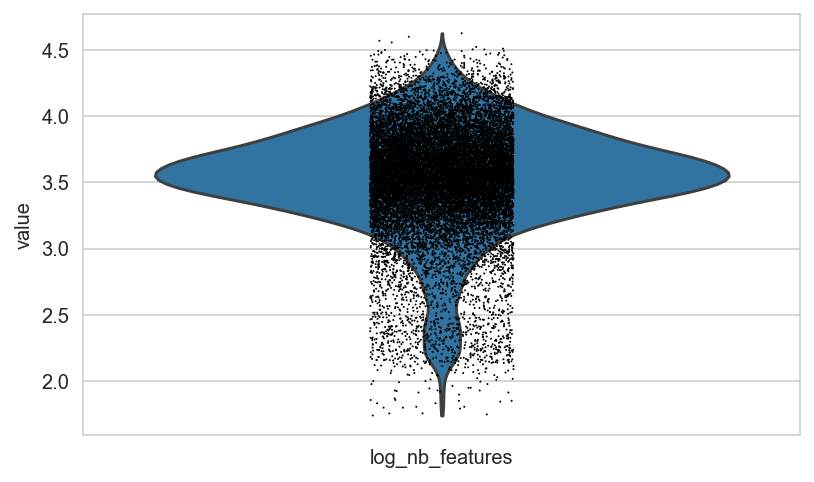

In [115]:
epi.pl.violin(adata, ["log_nb_features"])

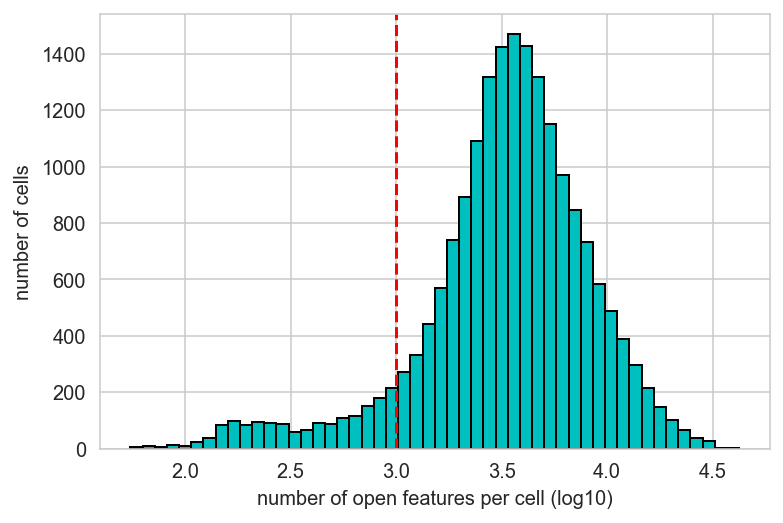

In [121]:
#minimum features to keep 
min_features = 1000

epi.pp.coverage_cells(adata,binary=True,log=10,bins=50,
                     threshold=min_features, save="data/epi/QC-plots/peak-mtx_coverage_cells.png")

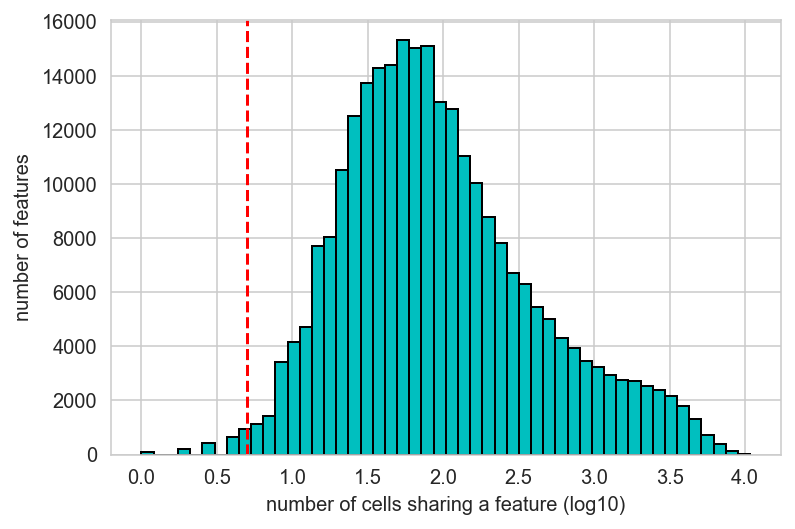

In [122]:
# minimum cells sharing a feature
min_cells = 5
epi.pp.coverage_features(adata, binary=True,log=True,
                        threshold=min_cells, save="data/epi/QC-plots/peak-mtx_coverage_peaks.png")

In [123]:
epi.pp.filter_features(adata, min_cells=min_cells)
epi.pp.filter_cells(adata, min_features=min_features)
adata

AnnData object with n_obs × n_vars = 17394 × 264215
    obs: 'NGI_ID', 'Tissue', 'caseNO', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness'
    layers: 'binary'

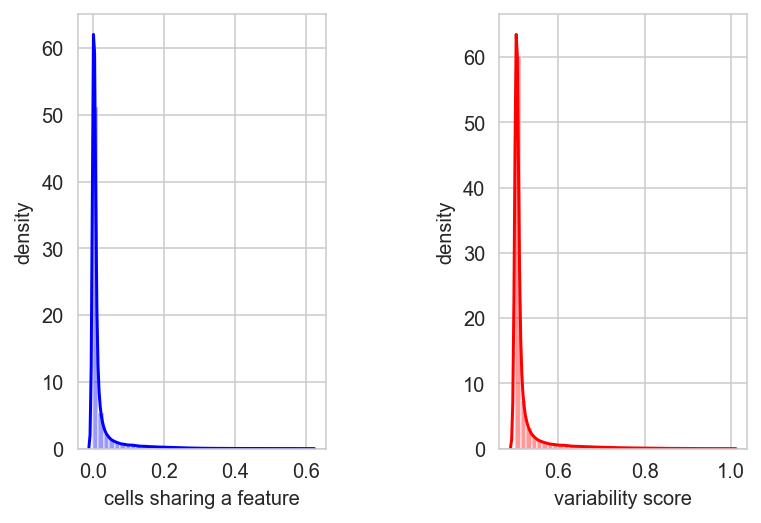

In [124]:
epi.pp.cal_var(adata)

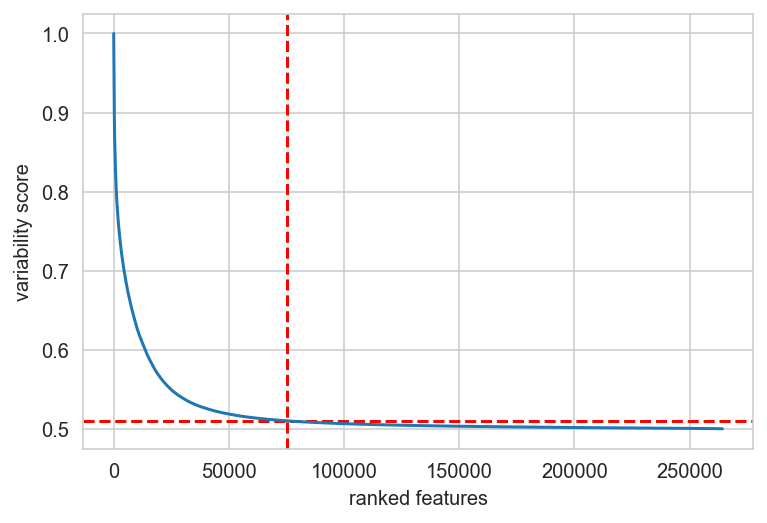

In [128]:
min_score_value = 0.51
nb_feature_selected = 75000

epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected,
                           save="data/epi/QC-plots/peak-mtx_variable_features_plot.png")

In [129]:
# save the current matrix in the raw layer
adata.raw = adata

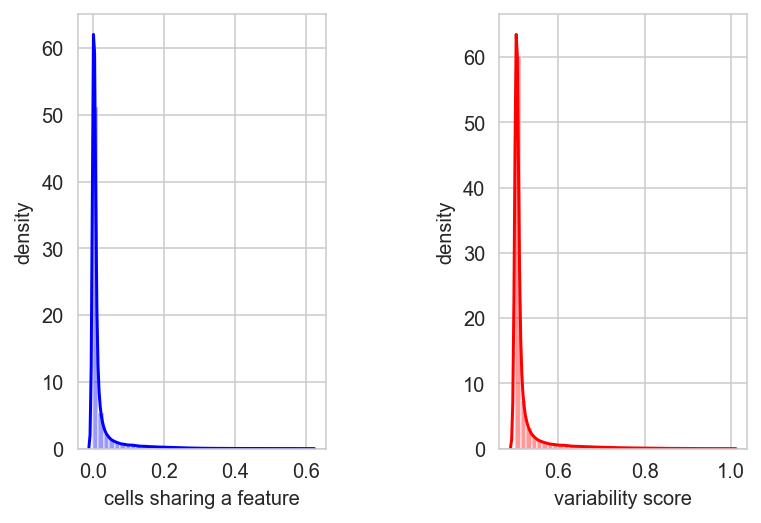

In [133]:
adata = epi.pp.select_var_feature(adata,
                                 nb_features=nb_feature_selected,
                                 show = False,
                                 copy=True)

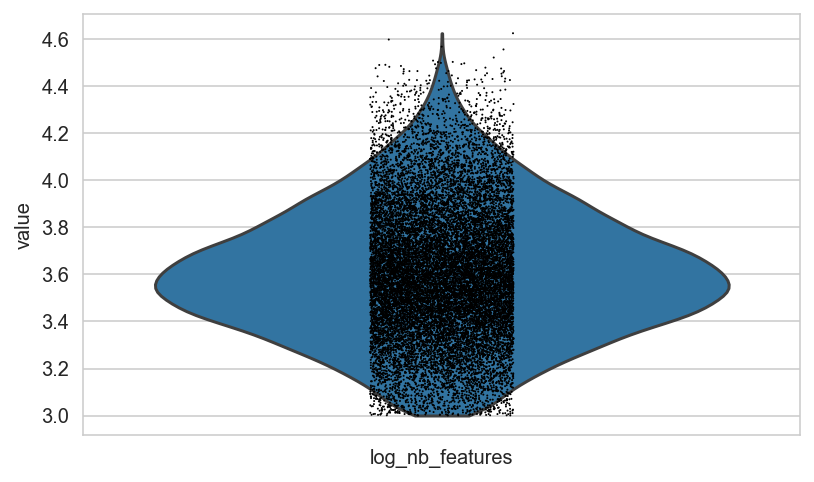

In [135]:
epi.pl.violin(adata, ['log_nb_features'])

In [138]:
epi.pp.filter_cells(adata, min_features=2000)
epi.pp.filter_cells(adata, max_features=25000)

Trying to set attribute `.obs` of view, copying.


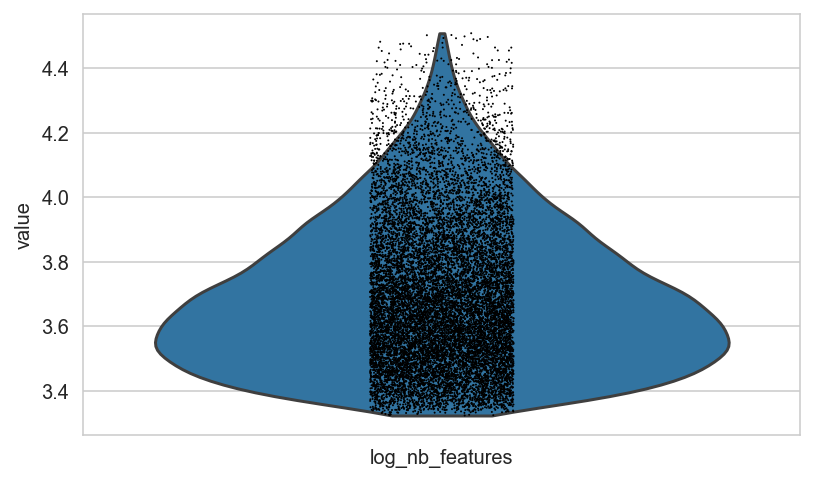

In [140]:
epi.pl.violin(adata, ['log_nb_features'])

In [141]:
adata

AnnData object with n_obs × n_vars = 14063 × 75188
    obs: 'NGI_ID', 'Tissue', 'caseNO', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'binary'

In [144]:
adata_MK_norm = adata

def TFIDF(x):
    tf_x = np.divide(x, x.sum(0))
    idf_x = np.diag(np.log(1 + (np.shape(x)[1]) / x.sum(1)))
    tfidf_x = np.dot(tf_x.T, idf_x).T
    return tfidf_x

In [145]:
X = adata.X.T  #transpose anndata matrix to get cells as columns
tfidf_X = TFIDF(X.toarray())  # convert to nparray and run TF-IDF

In [147]:
import scipy

In [148]:
import scipy
#convert back to scipy.sparse and transpose to get cells as rows
adata_MK_norm.X = scipy.sparse.csr_matrix(tfidf_X).T

In [149]:
adata.layers["MK_normalized"] = adata_MK_norm.X

In [151]:
adata.layers["MK_normalized"]

<14063x75188 sparse matrix of type '<class 'numpy.float32'>'
	with 72124798 stored elements in Compressed Sparse Column format>

In [153]:
adata.layers["binary"]

<14063x75188 sparse matrix of type '<class 'numpy.float32'>'
	with 72124798 stored elements in Compressed Sparse Row format>

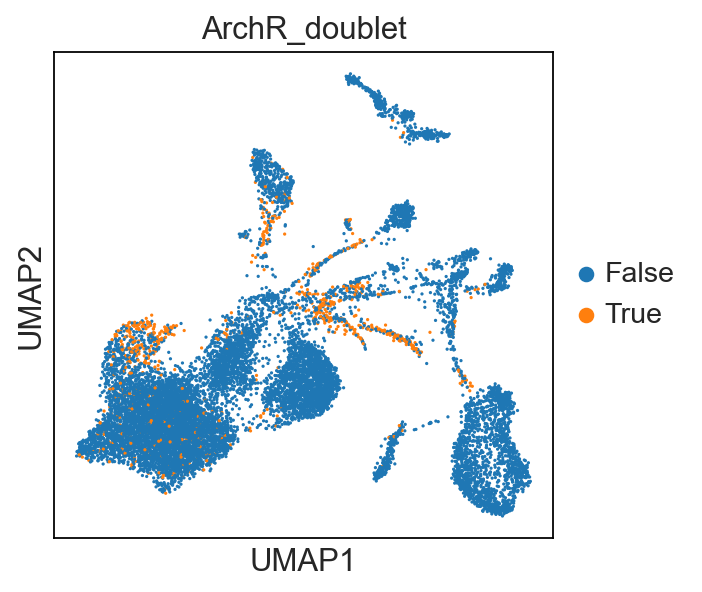

In [255]:
#epi.pp.lazy(adata)
sc.pl.umap(adata, color=["ArchR_doublet"], wspace=0.3)

In [156]:
epi.pp.normalize_total(adata)

In [157]:
adata.layers['normalised'] = adata.X.copy()

In [158]:
adata

AnnData object with n_obs × n_vars = 14063 × 75188
    obs: 'NGI_ID', 'Tissue', 'caseNO', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'pca', 'neighbors', 'umap', 'Tissue_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'MK_normalized', 'normalised'
    obsp: 'distances', 'connectivities'

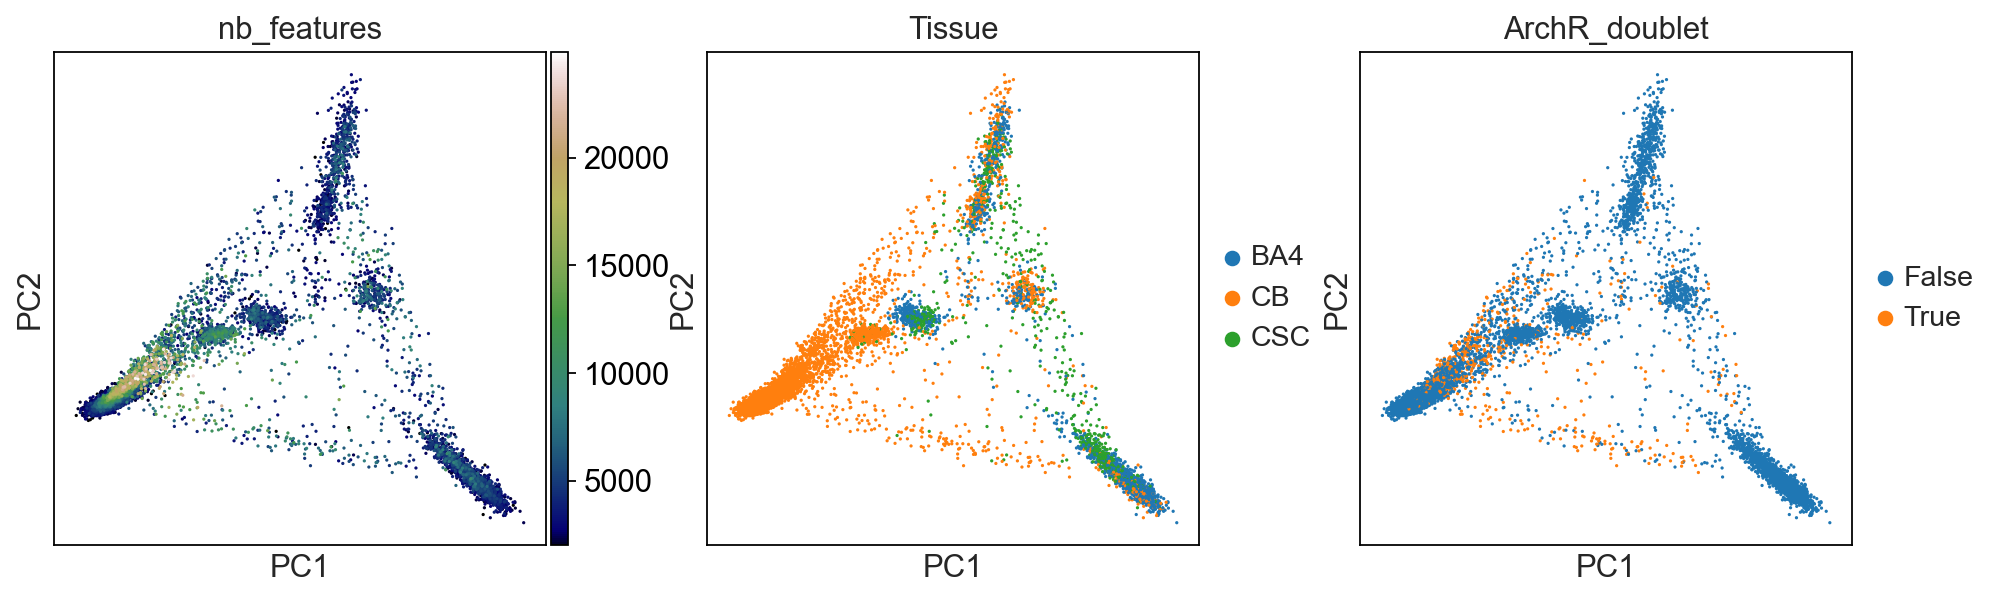

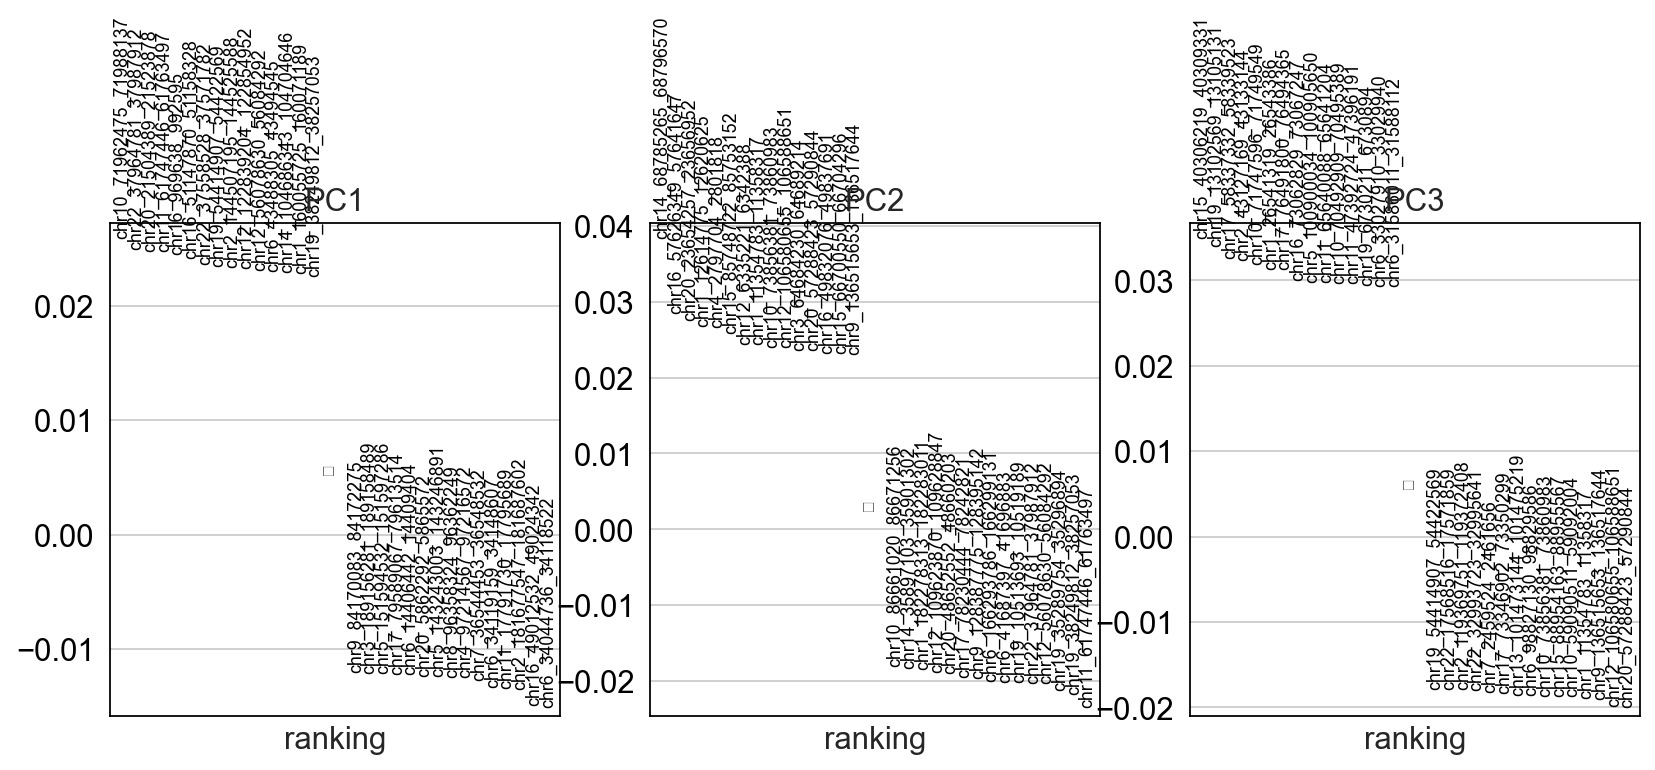

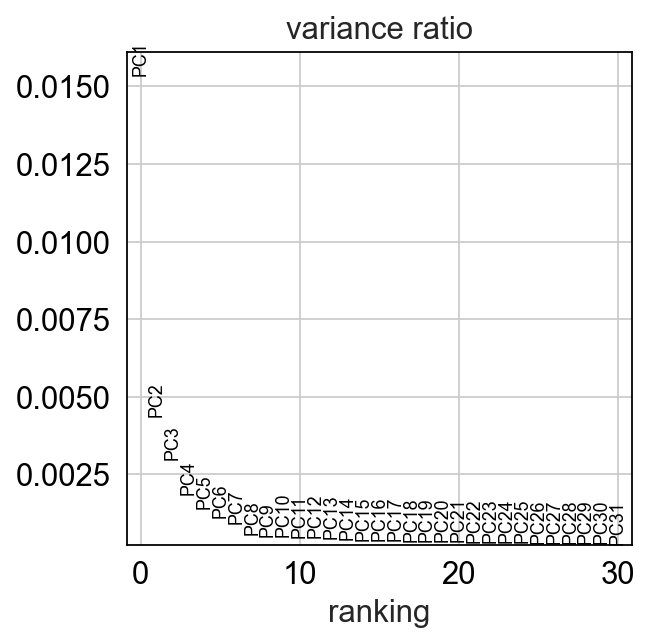

In [252]:
sc.settings.set_figure_params(dpi=80, color_map='gist_earth')
epi.pl.pca_overview(adata, color=['nb_features', 'Tissue', "ArchR_doublet"])

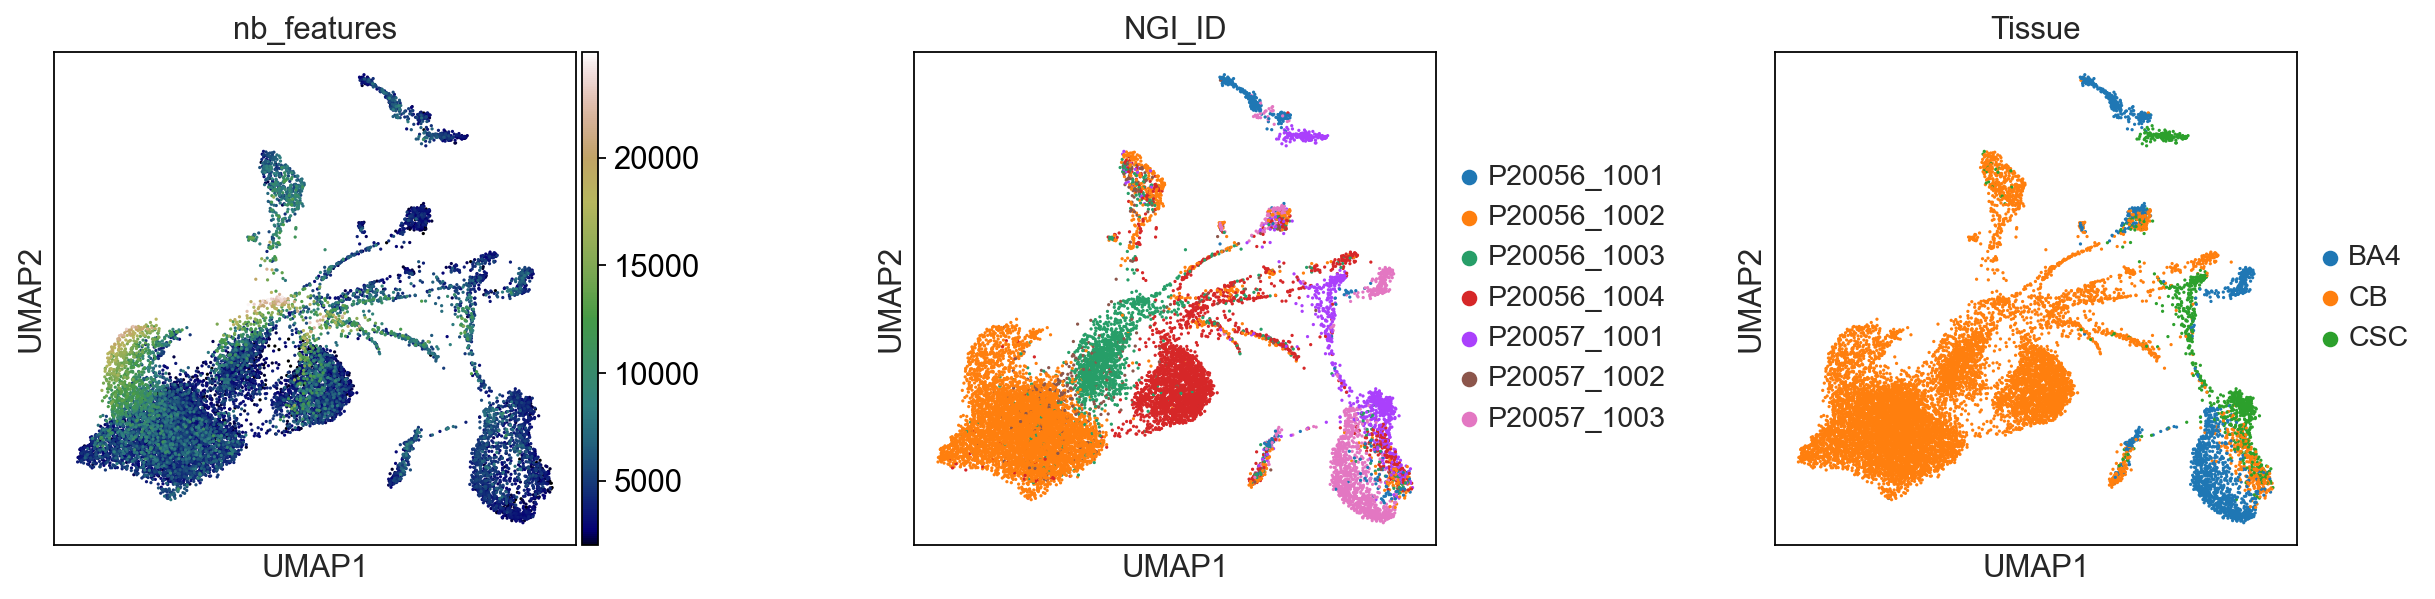

In [161]:
epi.pl.umap(adata, color=['nb_features', 'NGI_ID', 'Tissue'], wspace=0.5)

In [162]:
adata

AnnData object with n_obs × n_vars = 14063 × 75188
    obs: 'NGI_ID', 'Tissue', 'caseNO', 'MK_ID', '10X_BATCH', 'NGS_BATCH', 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    uns: 'pca', 'neighbors', 'umap', 'Tissue_colors', 'NGI_ID_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'binary', 'MK_normalized', 'normalised'
    obsp: 'distances', 'connectivities'

In [163]:
epi.tl.louvain(adata)

... storing 'ArchR_doublet' as categorical


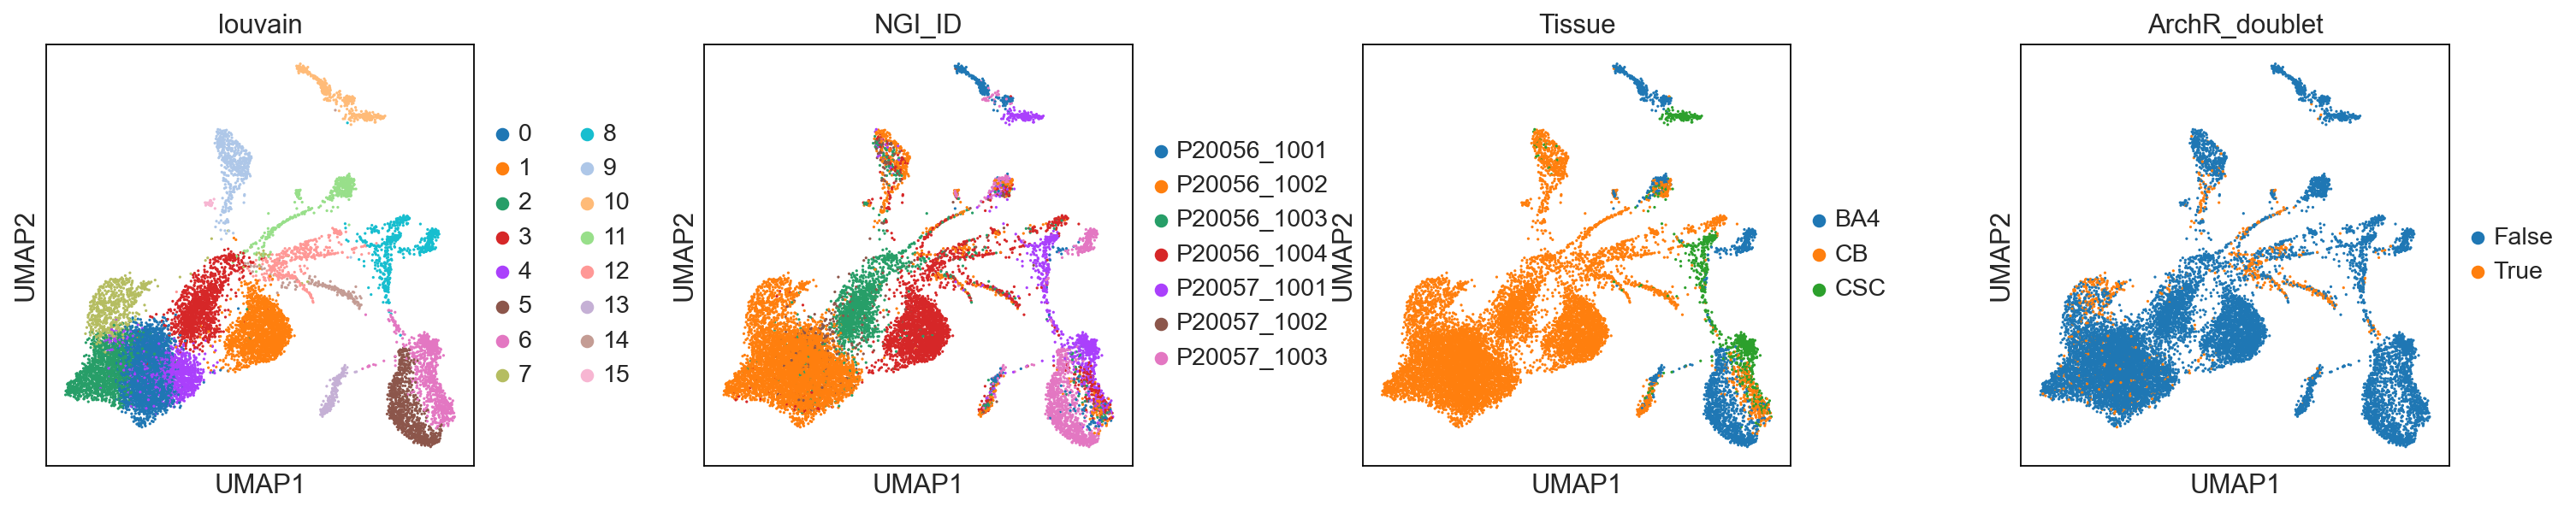

In [251]:
epi.pl.umap(adata, color=['louvain', 'NGI_ID', 'Tissue', 'ArchR_doublet'], wspace=0.4)

In [167]:
adata.obsm["MK_norm_SVD"] = epi.tl.pca(adata.layers["MK_normalized"])

AttributeError: 'NoneType' object has no attribute 'shape'

In [169]:
adata.write(results_file)

In [187]:
doublets = [i for i in all_bcd if i not in de_bcd]

In [222]:
#doublet_bcd = [i.split("#")[-1] for i in doublets]
doublet_bcd = []
for i in doublets:
    ngi_id,bcd = i.split("#")
    doublet_bcd.append(bcd[:-1]+inv_map[ngi_id])

In [200]:
inv_map = {v: k for k, v in GEM_WELL_BCD.items()}
inv_map

{'P20056_1001': '1',
 'P20056_1002': '2',
 'P20056_1003': '3',
 'P20056_1004': '4',
 'P20057_1001': '5',
 'P20057_1002': '6',
 'P20057_1003': '7'}

In [199]:
doublets

['P20056_1001#CTCGCTAAGATCTCAC-1',
 'P20056_1001#TACGCCTTCCGGGCAT-1',
 'P20056_1001#TTCGTTACATTCACGA-1',
 'P20056_1001#TATCGAGCAGTAGGCA-1',
 'P20056_1001#CTCCCAACATCCCTCA-1',
 'P20056_1001#GCTTAAGTCTATCCTA-1',
 'P20056_1002#AAGGTTCGTTACGGAG-1',
 'P20056_1002#GCTTAAGCACCTCGTT-1',
 'P20056_1002#AGCCTCTCATGGCCGT-1',
 'P20056_1002#TTCATCACAAAGGTCG-1',
 'P20056_1002#GTGCCAGTCTCTTCCT-1',
 'P20056_1002#AGCTGGCCATGGAGGT-1',
 'P20056_1002#TCCCACAAGACGAAAG-1',
 'P20056_1002#TTCAACTTCGGCTATA-1',
 'P20056_1002#TTCTAACAGATTACGA-1',
 'P20056_1002#TTACGTTAGCTGAAAT-1',
 'P20056_1002#CCTAAAGAGGCTGGAT-1',
 'P20056_1002#CAGCCTTAGTTCGACT-1',
 'P20056_1002#CGGTGCAGTGCATTGT-1',
 'P20056_1002#ACAAACCAGCCGCTGT-1',
 'P20056_1002#TATCTGTAGAGGCAGG-1',
 'P20056_1002#ATGTACGCAGCAACAG-1',
 'P20056_1002#GCGTAGCGTTGAAGCG-1',
 'P20056_1002#GGACACCTCCGATGCG-1',
 'P20056_1002#ACTGCGGAGTCGGGAT-1',
 'P20056_1002#CAAGAAATCTCATCCG-1',
 'P20056_1002#ACATGCACAAACAGTA-1',
 'P20056_1002#CCGAAGCCATGCCCTT-1',
 'P20056_1002#CGAGTT

In [205]:
doublet_bcd[-20:]

['GTCACTCGTAGCAGCA-7',
 'TTGCAGATCGGTTAGT-7',
 'CGTACAAAGGCGATTG-7',
 'GTAGGAGCAATGCCAT-7',
 'ACATGGTCAGATAAGT-7',
 'AACAGTCGTAAGTCTC-7',
 'GAGACTTAGGGCTTCC-7',
 'TTAGGTGGTACAACGG-7',
 'TTAGCGACAAATGTCC-7',
 'CCTTGCATCATGTTCT-7',
 'GTGCCAGGTCTGTTGA-7',
 'AACCAACCATTTAGGC-7',
 'TCGCAGGTCGAGAACG-7',
 'GGTGTCGAGGCGTCCT-7',
 'AACCTGAGTTTCTTAC-7',
 'CCTGGGACAAACGTTC-7',
 'CCTATTACATGCTATG-7',
 'CCGCATTCACACACAT-7',
 'ACTACGACAGCACATT-7',
 'AACGTACGTCCCGAGT-7']

In [228]:
l = [i for i in doublet_bcd if i in bcd_list]
len(l)

877

In [239]:
len(bcd_list)

19062

In [241]:
len(bcd_list)

14063

In [249]:
doublet_attr = []
for i in bcd_list:
    if i in l: 
        doublet_attr.append("True")
    else:
        doublet_attr.append("False")

In [258]:
len(np.where(adata.obs["ArchR_doublet"] == "True")[0])

785

In [265]:
meta.columns.to_list().dr

['ProcessNumber',
 'caseNO',
 'Tissue',
 'MK_ID',
 'NGI_ID',
 '10X_BATCH',
 'NGS_BATCH',
 'Box',
 '10XATAC_batch']